In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import flavio
import pickle
import datetime
import os
from tqdm import tqdm

import scipy.interpolate as interp

In [3]:
obs_si = ['FL', 'AFB', 'S3', 'S4', 'S5', 'S7', 'S8', 'S9']
c9 = 0
c10 = 0

wilson_coef = flavio.WilsonCoefficients()
# wilson_coef.set_initial({'C9_bsmumu' : c9, 'C10_bsmumu' : c10}, scale = 100)

In [4]:
def get_observable(q2_val, c_9_val, c_10_val, obs_const):
    wilson_coef.set_initial({'C9_bsmumu' : c_9_val, 'C10_bsmumu' : c_10_val}, scale = 100)

    return flavio.np_prediction(f'{obs_const}(B0->K*mumu)', wilson_coef, q2_val)

get_observable_vectorised = np.vectorize(get_observable, otypes=[np.float])

In [5]:
def get_dBR_dq2(q2_val, c_9_val, c_10_val):
    wilson_coef.set_initial({'C9_bsmumu' : c_9_val, 'C10_bsmumu' : c_10_val}, scale = 100)

    return flavio.np_prediction('dBR/dq2(B+->K*mumu)', wilson_coef, q2_val)

get_dBR_dq2_vectorised = np.vectorize(get_dBR_dq2, otypes=[np.float])

## Plot

In [5]:
qq = np.linspace(1.1,8,30)
c9 = np.linspace(-3,3,30)
c10 = np.linspace(-3,3,30)

x, y = np.meshgrid(qq, c9)

In [6]:
wilson_coef = flavio.WilsonCoefficients()

z = []
c_10_const = 0
obs_const = 'S5'

for q2 in qq:
    z_row = []
    for c in c9:
        wilson_coef.set_initial({'C9_bsmumu' : c, 'C10_bsmumu' : c_10_const}, scale = 100)

        temp_val = flavio.np_prediction(f'{obs_const}(B0->K*mumu)', wilson_coef, q2)
        z_row.append(temp_val)
    
    z.append(z_row)   

z = np.array(z).T

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/flavio/physics/bdecays/bvll/qcdf_interpolate.py:33: UserWarning: The QCDF corrections should not be trusted for q2 above 6 GeV^2
  warnings.warn("The QCDF corrections should not be trusted for q2 above 6 GeV^2")


<ipython-input-7-076dd81d9234>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


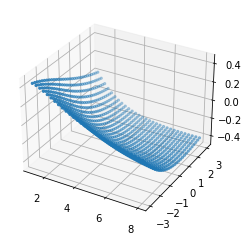

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, s=5)

fig.show()

In [43]:
qqii, ccii = np.mgrid[0.5:6:10j, -3:3:10j]
brii = get_observable_vectorised(qqii, ccii)

In [67]:
points = np.vstack([qqii.flatten(),ccii.flatten()]).T
values = get_observable_vectorised(qqii.flatten(), ccii.flatten())

z_interp = interp.griddata(points, values, (x, y), method='cubic')

<ipython-input-68-e561c93f23c7>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


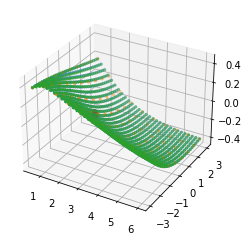

In [68]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, s=5)
ax.scatter(qqii, ccii, brii, s=5)
ax.scatter(x, y, z_interp, s=5)

ax.scatter(x[10,10], y[10,10], z_interp[10,10], s=100, c='red')

fig.show()

In [562]:
q_lin = np.linspace(0.5,6,10)
c9_lin = np.linspace(-3,3,10)
c10_lin = np.linspace(-3,3,10)

Q, C9, C10 = np.meshgrid(q_lin, c9_lin, c10_lin)


obs_values = get_observable_vectorised(Q, C9, C10, 'S4')

eval_points_q, eval_points_c9, eval_points_c10 = np.meshgrid(np.linspace(0.5,6,30),np.linspace(-3,3,30),np.linspace(-3,3,30))
eval_vals = interp.interpn([q_lin, c9_lin, c10_lin], obs_values, (eval_points_q, eval_points_c9, eval_points_c10))

In [563]:
obs_values.shape

(10, 10, 10)

<ipython-input-564-d50cfd8170e4>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


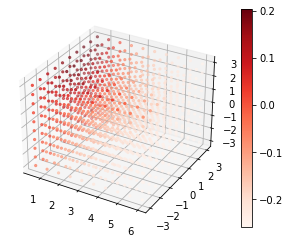

In [564]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

im = ax.scatter(Q, C9, C10, s=5, c=obs_values, cmap=plt.cm.Reds)

fig.colorbar(im)

fig.show()

In [565]:
eval_points_q, eval_points_c9, eval_points_c10 = np.meshgrid(np.linspace(0.5,6,30),np.linspace(-3,3,30),np.linspace(-3,3,30))
eval_vals = interp.interpn([q_lin, c9_lin, c10_lin], obs_values, (eval_points_q, eval_points_c9, eval_points_c10))

<ipython-input-566-8ea79f0b72b4>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


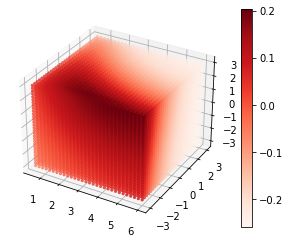

In [566]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

im = ax.scatter(eval_points_q, eval_points_c9, eval_points_c10, s=5, c=eval_vals, cmap=plt.cm.Reds)

fig.colorbar(im)

fig.show()

In [479]:
test_q, test_c9, test_c10 = np.meshgrid(
    np.random.uniform(0.5,6,10),
    np.random.uniform(-3,3,10),
    np.random.uniform(-3,3,10),
)

test_obs_values = get_observable_vectorised(test_q, test_c9, test_c10, 'S5')
test_obs_interp = interp.interpn([q_lin, c9_lin, c10_lin], obs_values, (test_q, test_c9, test_c10))

<ipython-input-484-feee8b20287d>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


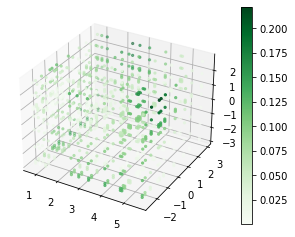

In [484]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

diff_test = abs(test_obs_values - test_obs_interp)
frac_diff = abs((test_obs_values - test_obs_interp) / test_obs_interp)
# im = ax.scatter(test_q, test_c9, test_c10, s=5, c=test_obs_values, cmap=plt.cm.Reds)
im = ax.scatter(test_q, test_c9, test_c10, s=5, c=diff_test, cmap=plt.cm.Greens)

fig.colorbar(im)

fig.show()

(array([316., 132.,  82.,  80.,  61.,  55.,  24.,  27.,  18.,  27.]),
 array([1.49614544e-04, 9.75217927e-02, 1.94893971e-01, 2.92266149e-01,
        3.89638327e-01, 4.87010505e-01, 5.84382683e-01, 6.81754861e-01,
        7.79127039e-01, 8.76499218e-01, 9.73871396e-01]),
 <BarContainer object of 10 artists>)

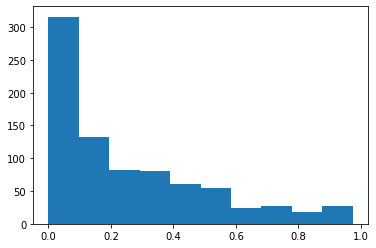

In [483]:
plt.hist(frac_diff[frac_diff < 1].flatten())

(array([303., 222., 129.,  77.,  62.,  54.,  57.,  57.,  19.,  20.]),
 array([2.57198409e-05, 2.05176972e-02, 4.10096746e-02, 6.15016520e-02,
        8.19936294e-02, 1.02485607e-01, 1.22977584e-01, 1.43469562e-01,
        1.63961539e-01, 1.84453516e-01, 2.04945494e-01]),
 <BarContainer object of 10 artists>)

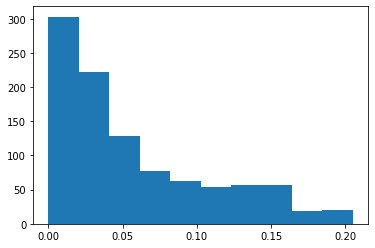

In [474]:
plt.hist(abs(test_obs_values - test_obs_interp).flatten())

# Generate Interpolation Basis Data

In [6]:
obs_si = ['FL', 'AFB', 'S3', 'S4', 'S5', 'S7', 'S8', 'S9']
q_min, q_max = 0.1, 8
c9_min, c9_max = -4, 4
c10_min, c10_max = -4, 4

resolution = 30
q_lin = np.linspace(q_min, q_max,resolution)
c9_lin = np.linspace(c9_min, c9_max,resolution)
c10_lin = np.linspace(c10_min, c10_max,resolution)

# Q, C9, C10 = np.meshgrid(q_lin, c9_lin, c10_lin)
Q, C9, C10 = np.mgrid[
    q_min:q_max:complex(resolution),
    c9_min:c9_max:complex(resolution),
    c10_min:c10_max:complex(resolution),
]

time_now = datetime.datetime.now()
interpolation_data_path = 'data/interpolation/'

observable_dict = {}
# for ob in obs_si[:1]:
for ob in tqdm(obs_si):
    # print(ob)
    obs_values = get_observable_vectorised(Q, C9, C10, ob)
    observable_dict[ob] = obs_values

# print('dBR/dq2')
observable_dict['dBR/dq2'] = get_dBR_dq2_vectorised(Q, C9, C10)

observable_dict['q_range'] = q_lin
observable_dict['c9_range'] = c9_lin
observable_dict['c10_range'] = c10_lin

observable_dict['q_grid'] = Q
observable_dict['c9_grid'] = C9
observable_dict['c10_grid'] = C10


with open(interpolation_data_path + f'interp_0.1-8_-4-4_{time_now.year}_{time_now.month}_{time_now.day}_{time_now.hour}', 'wb') as outfile:
    pickle.dump(observable_dict, outfile)

  0%|          | 0/8 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/flavio/physics/bdecays/bvll/qcdf_interpolate.py:33: UserWarning: The QCDF corrections should not be trusted for q2 above 6 GeV^2
  warnings.warn("The QCDF corrections should not be trusted for q2 above 6 GeV^2")
100%|██████████| 8/8 [30:38<00:00, 229.86s/it]


# Accuracy of interpolation

In [620]:
observable_data_path = 'data/interpolation/interp_2022_1_27_13'
with open(observable_data_path, 'rb') as infile:
    observable_dict_import = pickle.load(infile)

q_in = observable_dict_import['q_range']
c9_in = observable_dict_import['c9_range']
c10_in = observable_dict_import['c10_range']
# eval_points_q, eval_points_c9, eval_points_c10 = np.meshgrid(np.linspace(0.5,6,30),np.linspace(-3,3,30),np.linspace(-3,3,30))
# eval_vals = interp.interpn([q_lin, c9_lin, c10_lin], obs_values, (eval_points_q, eval_points_c9, eval_points_c10))
# Q_in, C9_in, C10_in = np.meshgrid(q_in, c9_in, c10_in)
Q_in = observable_dict_import['q_grid']
C9_in = observable_dict_import['c9_grid']
C10_in = observable_dict_import['c10_grid']

In [621]:
# eval_points_q, eval_points_c9, eval_points_c10 = np.meshgrid(
#     np.linspace(0.5,6,10),
#     np.linspace(-3,3,10),
#     np.linspace(-3,3,10)
# )

eval_points_q, eval_points_c9, eval_points_c10 = np.mgrid[
    0.5:6:11j,
    -3:3:11j,
    -3:3:11j,
]

diffs = {}
diffs_frac = {}
evals = {}
for ob in obs_si:
# for ob in ['S5']:
    obs_values = observable_dict_import[ob]
    eval_vals = interp.interpn(
        [q_in, c9_in, c10_in], 
        obs_values, 
        (eval_points_q, eval_points_c9, eval_points_c10),
        method='linear'
    )

    obs_values = get_observable_vectorised(eval_points_q, eval_points_c9, eval_points_c10, ob)

    diff = (obs_values - eval_vals)
    diff_frac = diff/eval_vals

    diffs[ob] = diff.flatten()
    diffs_frac[ob] = diff_frac.flatten()
    evals[ob] = eval_vals

In [622]:
eval_points_q.shape, Q_in.shape

((11, 11, 11), (20, 20, 20))

<ipython-input-623-0d845cfeacf0>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-623-0d845cfeacf0>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


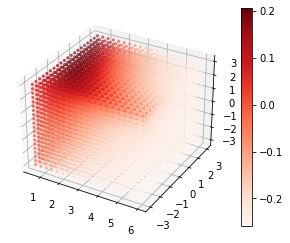

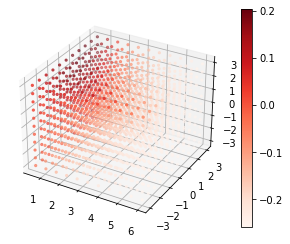

In [623]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# im = ax.scatter(eval_points_q, eval_points_c9, eval_points_c10, s=5, c=eval_vals, cmap=plt.cm.Reds)
im = ax.scatter(Q_in, C9_in, C10_in, s=5, c=observable_dict_import['S4'], cmap=plt.cm.Reds)

fig.colorbar(im)

fig.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

im = ax.scatter(eval_points_q, eval_points_c9, eval_points_c10, s=5, c=evals['S4'], cmap=plt.cm.Reds)
# im = ax.scatter(Q_in, C9_in, C10_in, s=5, c=observable_dict_import['S4'], cmap=plt.cm.Reds)

fig.colorbar(im)

fig.show()

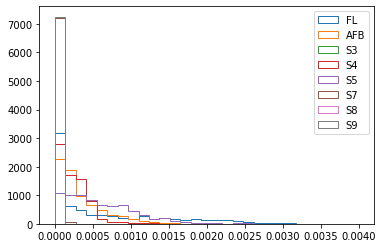

In [625]:
bin_edges = np.linspace(0,0.004,30)
for ob in obs_si:
    plt.hist(abs(diffs[ob]), histtype='step', label=ob, density=True, bins=bin_edges)
plt.legend()
plt.show()

# 3D interpolation of dBR q2